In [453]:
import numpy as np 
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
import plotly.express as px 
import matplotlib.pyplot as plt  

## PRE-PROCESSING

WRANGLING

In [454]:
df = pd.read_excel("C:\\Users\\Naman Varshney\\Documents\\assignment\\customer_churn_large_dataset.xlsx")
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  100000
nNumber of features: 9
nData Features:
['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']
nMissing values: 0
nUnique values:
CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64


In [455]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


## ANALYSIS

In [456]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [457]:
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [458]:
df.isna().sum()/df.shape[0]*100

CustomerID                    0.0
Name                          0.0
Age                           0.0
Gender                        0.0
Location                      0.0
Subscription_Length_Months    0.0
Monthly_Bill                  0.0
Total_Usage_GB                0.0
Churn                         0.0
dtype: float64

In [459]:
df['Churn'].value_counts()

Churn
0    50221
1    49779
Name: count, dtype: int64

In [460]:
ob_col = df.select_dtypes(include = ["O"]).columns
ob_col

Index(['Name', 'Gender', 'Location'], dtype='object')

In [461]:
df_num = df.drop(columns = ob_col )
df_num.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,63,17,73.36,236,0
1,2,62,1,48.76,172,0
2,3,24,5,85.47,460,0
3,4,36,3,97.94,297,1
4,5,46,19,58.14,266,0


## VISUALISATION

CORRELATION HEATMAP

<Axes: >

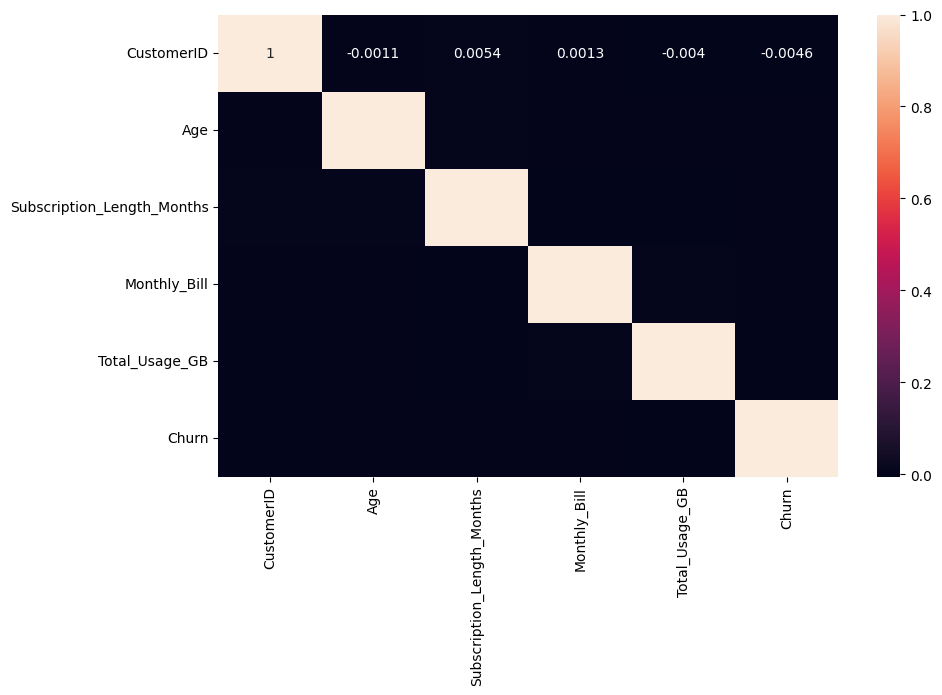

In [462]:
corr=df_num.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [463]:
#Defining bar chart function
def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
    return fig.show()
    

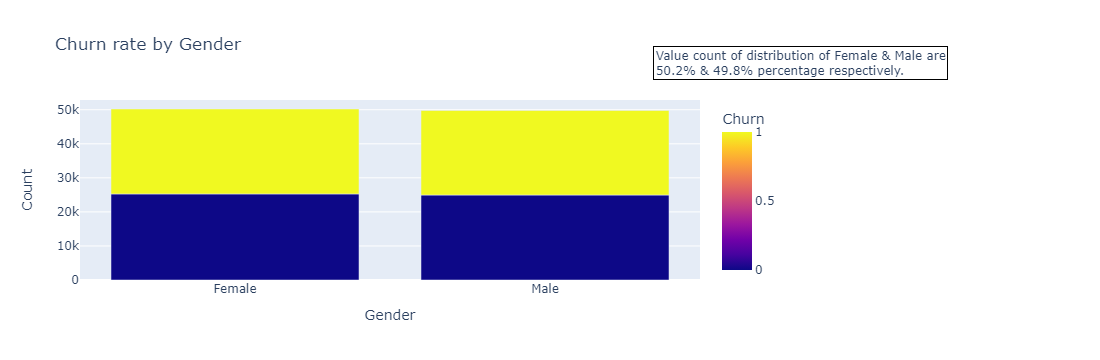

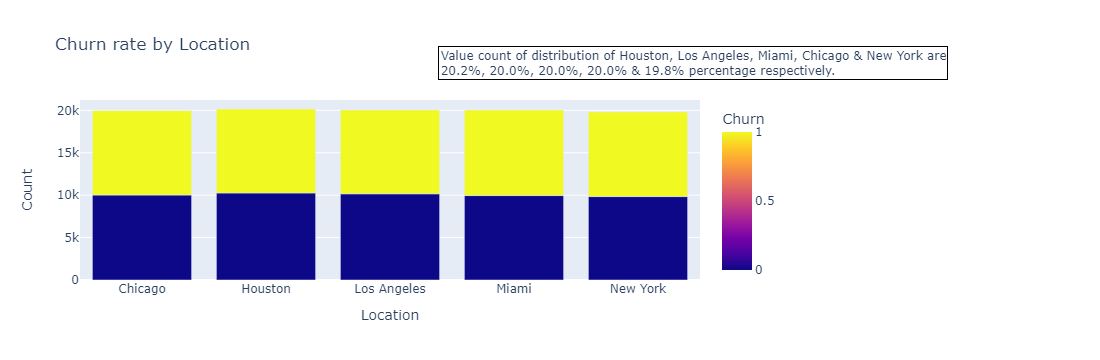

In [464]:
#Gender feature plot
bar('Gender')
bar('Location')

In [465]:
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

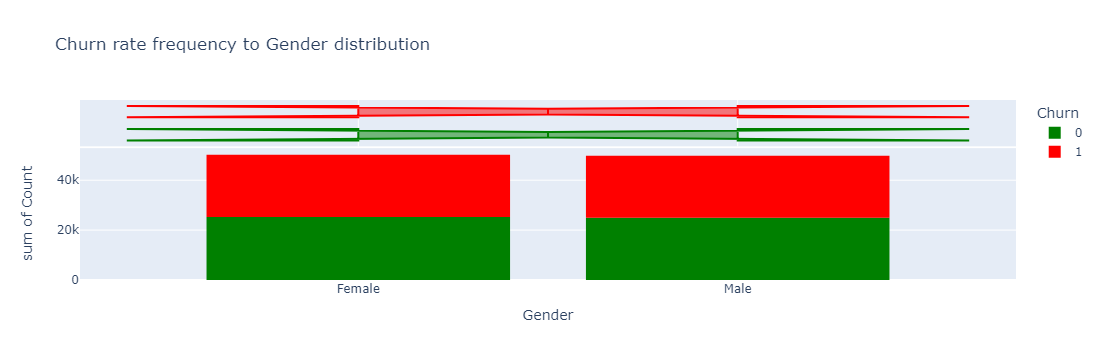

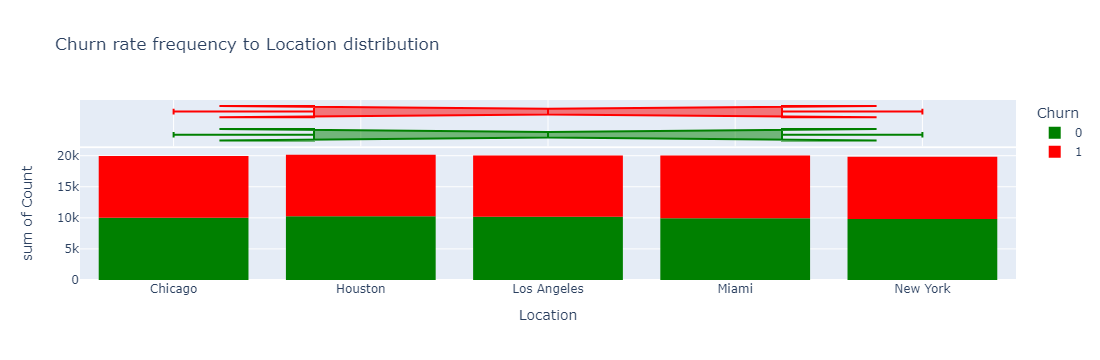

In [466]:
hist('Gender')
hist('Location')


## PROBLEM SOLVING

In [467]:
new_df=df.copy()
new_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [468]:
objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['Name', 'Gender', 'Location'], dtype='object')


THERE ARE 3 ATTRIBUTES WITH Object Datatype. THUS WE NEED TO LABEL ENCODE THEM IN ORDER TO CHECK MULTICOLINEARITY.

## LABEL ENCODING

In [469]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))
print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  int32  
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  int32  
 4   Location                    100000 non-null  int32  
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 5.7 MB
None


In [470]:
new_df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,0,63,1,2,17,73.36,236,0
1,2,11112,62,0,4,1,48.76,172,0
2,3,22223,24,0,2,5,85.47,460,0
3,4,33334,36,0,3,3,97.94,297,1
4,5,44445,46,0,3,19,58.14,266,0


## MULTICOLINEARITY

In [471]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)
calc_vif(new_df)

,variables,VIF
0,CustomerID,11.998410
1,Name,12.003819
2,Age,7.074995
3,Gender,1.935296
4,Location,2.825094
5,Subscription_Length_Months,3.851975
6,Monthly_Bill,7.964251
7,Total_Usage_GB,4.732472
8,Churn,1.935092


We can see that CustomerID and Name have too high VIF thus they are highly correlated. 
Thus combine these pairs of collinear attributes and drop the individual ones.

In [472]:
#new_df['AgeMonth'] = new_df.apply(lambda x: x['Age'] - x['Monthly_Bill'],axis=1)
new_df['NameID'] = new_df.apply(lambda x: x['CustomerID'] + x['Name'],axis=1)
new_df = new_df.drop(['CustomerID','Name'],axis=1)
calc_vif(new_df)

,variables,VIF
0,Age,7.074994
1,Gender,1.935215
2,Location,2.824925
3,Subscription_Length_Months,3.851943
4,Monthly_Bill,7.964198
5,Total_Usage_GB,4.732457
6,Churn,1.935041
7,NameID,3.889259


<Axes: >

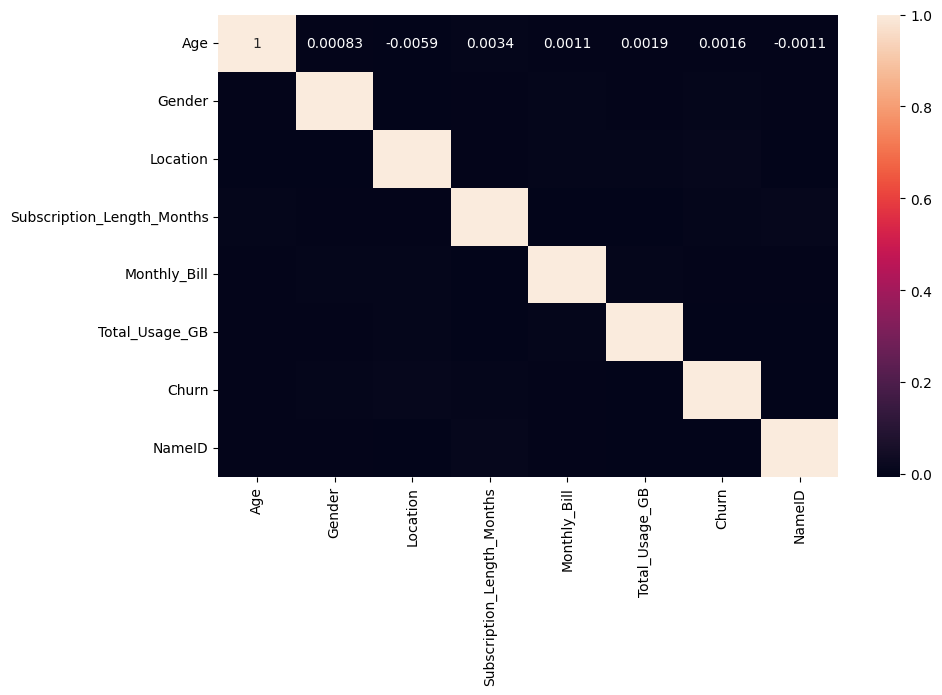

In [473]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot= True)

How did you select variables to be included in the model?

Using the VIF values and correlation heatmap. We just need to check if there are any two attributes highly correlated to each other and then drop the one which is less correlated to the Churn Attribute

## MODEL BUILDING

In [474]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## NORMALIZING (SCALING) AMOUNT

In [475]:
scaler = StandardScaler()
new_df["NormalizedTotal_Usage_GB"] = scaler.fit_transform(new_df["Total_Usage_GB"].values.reshape(-1, 1))
new_df.drop(["Total_Usage_GB"], inplace= True, axis= 1)
Y = new_df["Churn"]
X = new_df.drop(["Churn"], axis= 1)

I did not normalize the complete dataset because it may lead to decrease in accuracy of model.

## TRAIN-TEST SPLIT

In [476]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (70000, 7)
Shape of X_test:  (30000, 7)


## MODEL TRAINING

In [477]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [478]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 5)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

## EVALUATION

In [479]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  49.62666666666667
Random Forest Score:  49.95333333333333


In [480]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
 
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
LinearRegression = lr.score(X_test, Y_test) * 100
LinearRegression

-0.01788923769514561

In [481]:
from sklearn.neighbors import KNeighborsClassifier  
classifier4= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier4.fit(X_train, Y_train)  

KNeighborsClassifier()

In [482]:
Y_pred= classifier4.predict(X_test)  
classifier_score = classifier4.score(X_test, Y_test) * 100
print(classifier_score)

49.87666666666667


In [483]:
import xgboost
print(xgboost.__version__)

2.0.0


In [484]:
from xgboost import XGBRegressor

In [485]:
model = XGBRegressor()
model.fit(X_train, Y_train)
Y_pred= model.predict(X_test)  
classifier_score = model.score(X_test, Y_test) * 100
print(classifier_score)

-4.235489402015991


In [486]:
from sklearn.naive_bayes import GaussianNB  
classifier2 = GaussianNB()  
classifier2.fit(X_train, Y_train)  

GaussianNB()

In [487]:
Y_pred_gnb = classifier2.predict(X_test)
score = classifier2.score(X_test, Y_test) * 100
score

50.13666666666666

In [488]:
from sklearn.linear_model import LogisticRegression  
classifier3= LogisticRegression()    
classifier3.fit(X_train, Y_train)  

LogisticRegression()

In [489]:
Y_pred_lr= classifier3.predict(X_test)  
classifier_score = classifier3.score(X_test, Y_test) * 100
print(classifier_score)

50.50666666666667


## Hyper tuning

In [490]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=100,  
                   multi_class='auto', n_jobs=None, penalty='l2',  
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,  
                   warm_start=False)    
classifier.fit(X_train, Y_train) 

LogisticRegression(C=10000.0, random_state=0)

In [491]:
Y_pred_lr= classifier.predict(X_test)  
classifier_score = classifier.score(X_test, Y_test) * 100
print(classifier_score)

50.50666666666667


In [492]:
# key terms of Confusion Matrix - gnb

print("TP,FP,TN,FN - gnb")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_gnb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - lr

print("TP,FP,TN,FN - lr")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_lr).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - gnb
True Positives: 5392
False Positives: 5503
True Negatives: 9649
False Negatives: 9456
----------------------------------------------------------------------------------------
TP,FP,TN,FN - lr
True Positives: 0
False Positives: 0
True Negatives: 15152
False Negatives: 14848


TP(gnb) >> TP(lr) 

FP(gnb) >> FP(lr) - lr has an edge

TN(gnb) < TN(lr) - lr is better here too

FN(gnb) < FN(lr)

Here Logistic Regression looks good.

In [493]:
# confusion matrix - gnb

confusion_matrix_gnb = confusion_matrix(Y_test, Y_pred_gnb.round())
print("Confusion Matrix - gnb")
print(confusion_matrix_gnb,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - lr

confusion_matrix_lr = confusion_matrix(Y_test, Y_pred_lr.round())
print("Confusion Matrix - lr")
print(confusion_matrix_lr)

Confusion Matrix - gnb
[[9649 5503]
 [9456 5392]]
----------------------------------------------------------------------------------------
Confusion Matrix - lr
[[15152     0]
 [14848     0]]


In [494]:
# classification report - gnb

classification_report_gnb = classification_report(Y_test, Y_pred_gnb)
print("Classification Report - gnb")
print(classification_report_gnb)

print("----------------------------------------------------------------------------------------")

# classification report - lr

classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report - lr")
print(classification_report_lr)

Classification Report - gnb
              precision    recall  f1-score   support

           0       0.51      0.64      0.56     15152
           1       0.49      0.36      0.42     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.49     30000
weighted avg       0.50      0.50      0.49     30000

----------------------------------------------------------------------------------------
Classification Report - lr
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     15152
           1       0.00      0.00      0.00     14848

    accuracy                           0.51     30000
   macro avg       0.25      0.50      0.34     30000
weighted avg       0.26      0.51      0.34     30000



C:\Users\Naman Varshney\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Naman Varshney\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Naman Varshney\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



With Such a precision and hence F1-Score, Logistic Regression comes out to be better as expected.

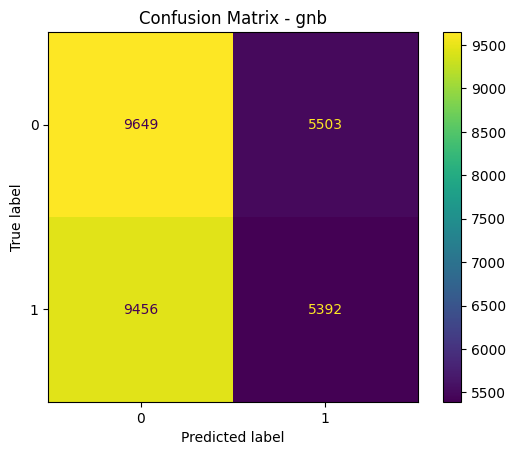

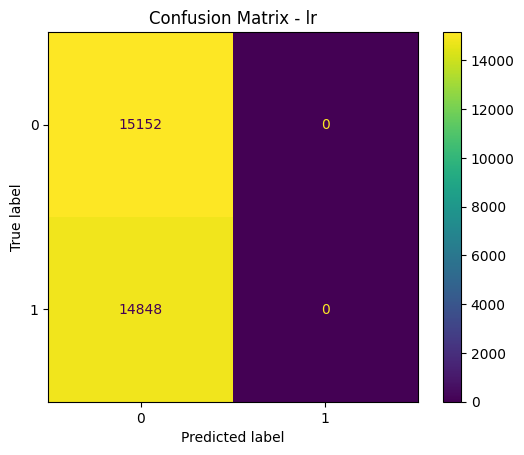

In [495]:
# visualising confusion matrix - gnb
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_gnb)
disp.plot()
plt.title('Confusion Matrix - gnb')
plt.show()

# visualising confusion matrix - lr
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr)
disp.plot()
plt.title('Confusion Matrix - lr')
plt.show()

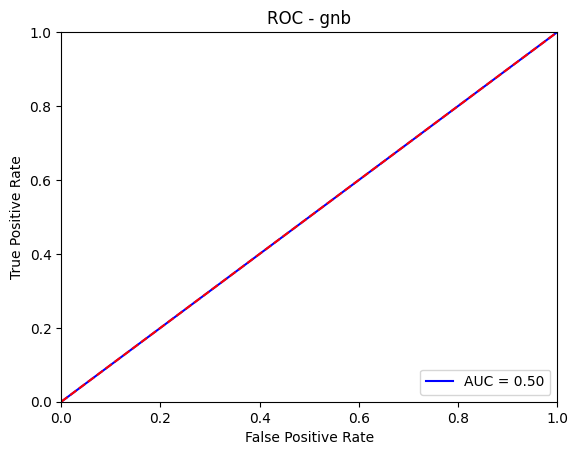

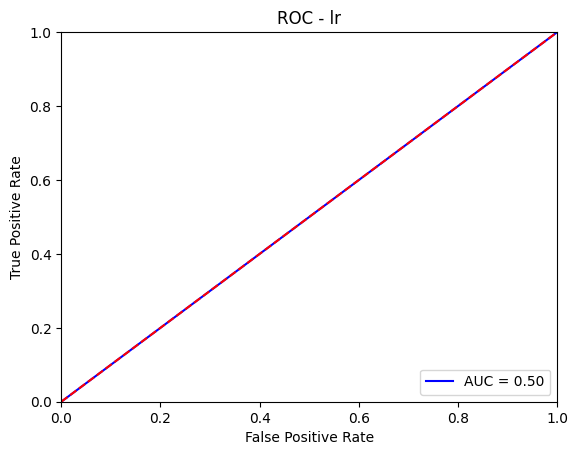

In [496]:
# AUC ROC - lr
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - gnb')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - lr
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - lr')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both gnb and Random lr is equal, so both models are pretty good at what they do.

In [497]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(classifier, filename)

['model.sav']

## Thank you